In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
col=["sepal length","sepal width","petal length","petal width","class"]
df=pd.read_csv("iris.csv",names=col)
df.head(2)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df["class"]=df["class"].replace(
    {"Iris-setosa":0,
     "Iris-versicolor":1,
     "Iris-virginica":2
     
    }
)

In [7]:
df["class"].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
df["class"].dtype

dtype('int64')

In [9]:
df.describe() # petal length has little skewness

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


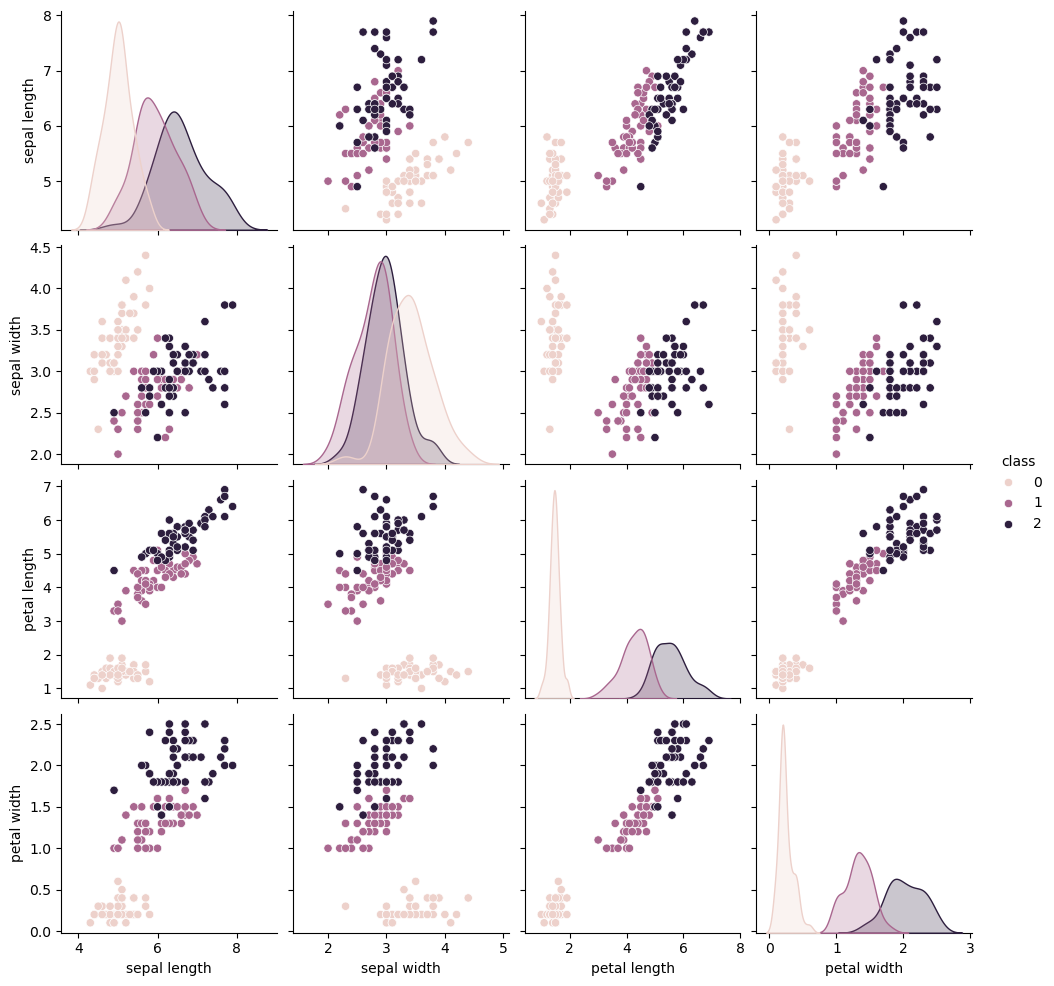

In [10]:
sns.pairplot(data=df,hue="class")

In [11]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

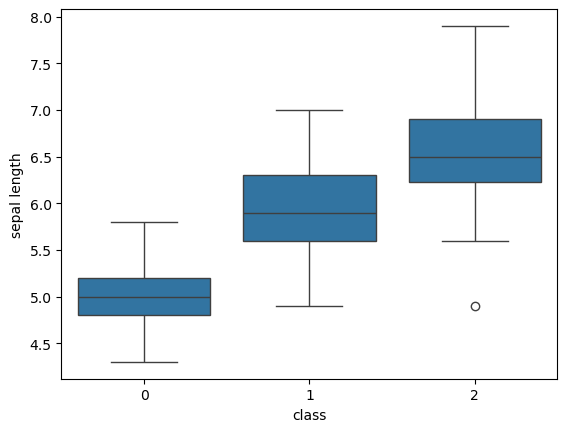

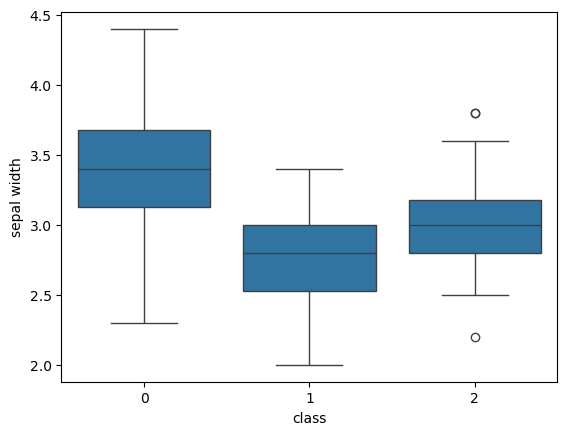

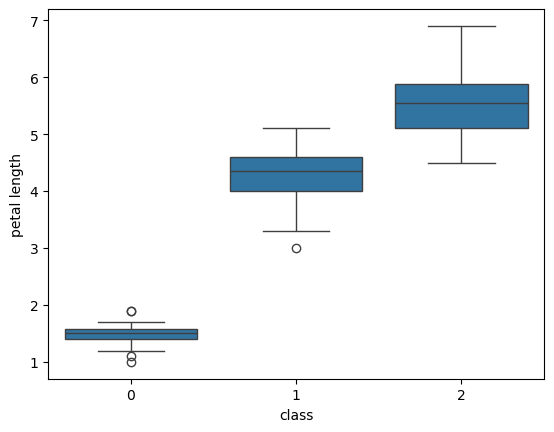

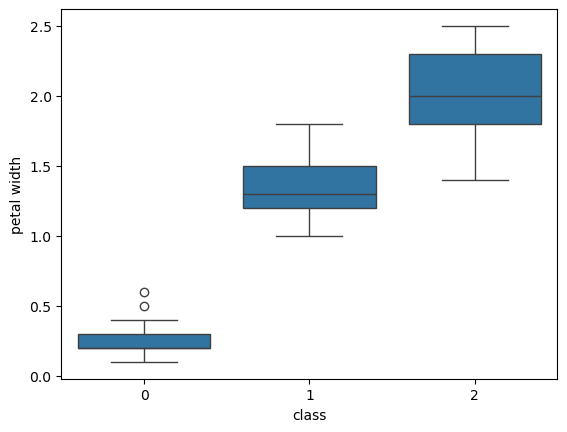

In [12]:
for i in df.select_dtypes(float).columns:
    sns.boxplot(data=df,y=df[i],x="class")
    plt.show()

In [13]:
features=df.drop("class",axis=1)
target=df["class"]

In [14]:
from sklearn.model_selection import train_test_split
# putting stratify because target is imbalanced. 
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.15)
print(f"Training data : {xtrain.shape, ytrain.shape}" )
print(f"Testing data : {xtest.shape, ytest.shape}" )

Training data : ((127, 4), (127,))
Testing data : ((23, 4), (23,))


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    # checking overfitting underfitting
    training_score=model.score(xtrain,ytrain)
    testing_score=model.score(xtest,ytest)
    print(f"Training Score : {training_score}")
    print(f"Testing Score : {testing_score}")
    print(f"Confusion Matrix : \n{confusion_matrix(ytest,ypred)}")
    # classification report
    print(f"Classification Report : \n{classification_report(ytest,ypred)}")
    return model

    

In [17]:
mymodel(LogisticRegression()) # underfitting

Training Score : 0.9763779527559056
Testing Score : 1.0
Confusion Matrix : 
[[8 0 0]
 [0 9 0]
 [0 0 6]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



LogisticRegression()

In [18]:
dt=mymodel(DecisionTreeClassifier()) # overfitting
dt

Training Score : 1.0
Testing Score : 1.0
Confusion Matrix : 
[[8 0 0]
 [0 9 0]
 [0 0 6]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



DecisionTreeClassifier()

In [19]:
dt.feature_importances_

array([0.        , 0.01575487, 0.41839769, 0.56584744])

In [20]:
xtrain.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [21]:
# pruning techniques
parameters={
    "criterion":['gini','entropy'],
    "max_depth":list(range(4,15)),
    "min_samples_leaf":list(range(4,15))
}

In [22]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(DecisionTreeClassifier(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 242 candidates, totalling 1210 fits
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14]},
             verbose=2)

In [23]:
grid.best_score_

0.944923076923077

In [24]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

In [25]:
dt=mymodel(grid.best_estimator_)
dt # still results are saying overfitting is there

Training Score : 0.9606299212598425
Testing Score : 0.9130434782608695
Confusion Matrix : 
[[8 0 0]
 [0 8 1]
 [0 1 5]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      0.89      0.89         9
           2       0.83      0.83      0.83         6

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

In [26]:
from sklearn import tree

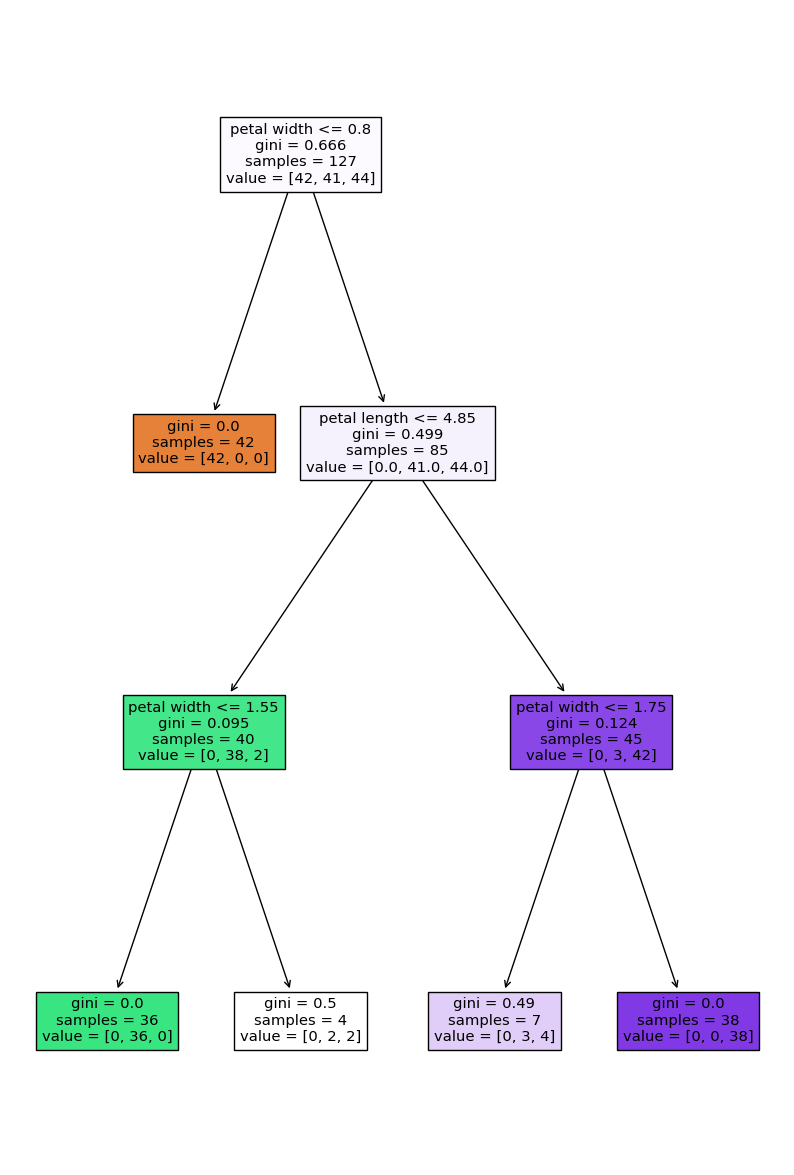

In [27]:
fig,ax=plt.subplots(figsize=(10,15))
tree.plot_tree(dt,feature_names=features.columns,filled=True)
plt.show()

In [28]:
dt.feature_importances_

array([0.        , 0.        , 0.41725373, 0.58274627])

In [29]:
xtrain.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [30]:
from sklearn.svm import SVC
mymodel(SVC()) 

Training Score : 0.9763779527559056
Testing Score : 1.0
Confusion Matrix : 
[[8 0 0]
 [0 9 0]
 [0 0 6]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



SVC()

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
clf = make_pipeline(StandardScaler(), SVC())

In [33]:
mymodel(clf) 

Training Score : 0.9763779527559056
Testing Score : 0.9565217391304348
Confusion Matrix : 
[[8 0 0]
 [0 8 1]
 [0 0 6]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.89      0.94         9
           2       0.86      1.00      0.92         6

    accuracy                           0.96        23
   macro avg       0.95      0.96      0.95        23
weighted avg       0.96      0.96      0.96        23



Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [34]:
# generally c and gamma value is taken as 0.001,0.01,0.1,1,10
# grid search cv for doing hyperparameter tuning
parameter={
    "C":[0.001,0.01,0.1,1,10],
    "gamma":[0.001,0.01,0.1,1,10],
    "kernel":['rbf']
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),parameter,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=2)

In [35]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [36]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [37]:
mymodel(grid.best_estimator_)

Training Score : 0.984251968503937
Testing Score : 0.9565217391304348
Confusion Matrix : 
[[8 0 0]
 [0 8 1]
 [0 0 6]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.89      0.94         9
           2       0.86      1.00      0.92         6

    accuracy                           0.96        23
   macro avg       0.95      0.96      0.95        23
weighted avg       0.96      0.96      0.96        23



SVC(C=10, gamma=0.1)

In [87]:
from sklearn.naive_bayes import GaussianNB
mymodel(GaussianNB())

Training Score : 0.952755905511811
Testing Score : 1.0
Confusion Matrix : 
[[8 0 0]
 [0 9 0]
 [0 0 6]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



GaussianNB()